**GOAL :** We aim to segment the Customers based on RFM so that the company can target its customers efficiently.

## Reading and Understanding Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
retail = pd.read_csv('/content/OnlineRetail.csv',sep=',',encoding="ISO-8859-1",header=0)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
retail['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

**WHITE HANGING HEART T-LIGHT HOLDER,** 

**REGENCY CAKESTAND 3 TIER,**

**JUMBO BAG RED RETROSPOT**

 are the most selling objects.

## Data Cleaning

In [6]:
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
retail=retail.dropna()
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


## Data Preparation

In [8]:
retail['CustomerID']=retail['CustomerID'].astype(str)

Analysis Data to be prepared on the below 3 factors (RFM):


1.   Recency
2.   Frequency
3.   Monetary



In [9]:
#New Attribute : Monetary [Amount generated per customer]

retail['Amount']=retail['Quantity']*retail['UnitPrice']
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [10]:
#New Attribute : Frequency

rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID','Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [11]:
#merging the 2 dfs

rfm = pd.merge(rfm_m,rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [12]:
#New Attribute : Recency

retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [13]:
max_date=max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [14]:
retail['Diff']=max_date - retail['InvoiceDate']
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0 days 00:00:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0 days 00:00:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00


In [15]:
rfm_p =retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [16]:
rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


In [17]:
#merging all to creatte the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


**OUTLIERS   ANALYSIS** 

Text(0.5, 0, 'Attributes')

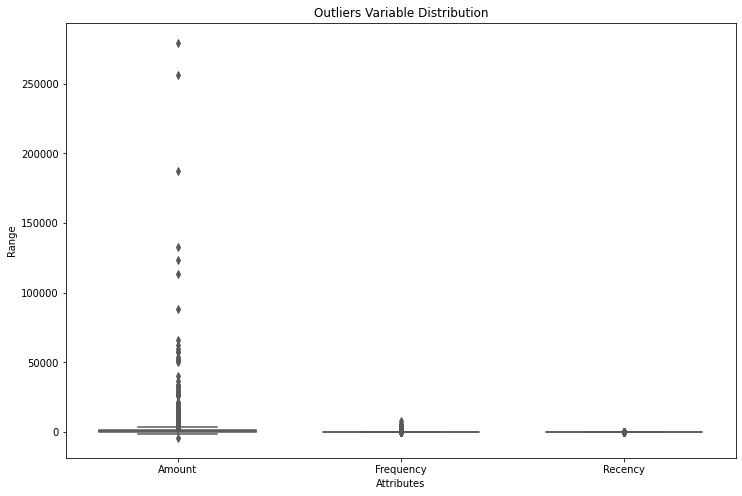

In [18]:
attributes=['Amount','Frequency','Recency']
plt.figure(figsize=(12,8))
sns.boxplot(data=rfm[attributes], orient="v",palette="Set2",whis=1.5, saturation=1,width=0.7)
plt.title("Outliers Variable Distribution")
plt.ylabel("Range")
plt.xlabel("Attributes")

In [19]:
q1=rfm.Amount.quantile(0.05)
q3=rfm.Amount.quantile(0.95)
iqr=q3-q1
rfm=rfm[(rfm.Amount >= (q1-1.5*iqr)) & (rfm.Amount <=(q3 + 1.5*iqr))]

q1=rfm.Recency.quantile(0.05)
q3=rfm.Recency.quantile(0.95)
iqr=q3-q1
rfm=rfm[(rfm.Recency >= (q1-1.5*iqr)) & (rfm.Recency <=(q3 + 1.5*iqr))]

q1=rfm.Frequency.quantile(0.05)
q3=rfm.Frequency.quantile(0.95)
iqr=q3-q1
rfm=rfm[(rfm.Frequency >= (q1-1.5*iqr)) & (rfm.Frequency <=(q3 + 1.5*iqr))]

In [20]:
rfm.shape

(4293, 4)

In [21]:
#Standardization

rfm_df=rfm[['Amount','Frequency','Recency']]
scaler=StandardScaler()

scaleddf=scaler.fit_transform(rfm_df)
scaleddf.shape

(4293, 3)

In [22]:
df=pd.DataFrame(scaleddf)
df.columns= ['Amount','Frequency','Recency']
df.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


## BUILDING MODEL


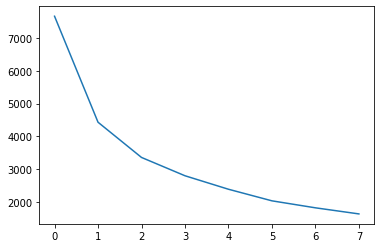

In [23]:
#Elbow-Curve

wcss=[]

for num in range(2,10):
  kmeans=KMeans(n_clusters=num, max_iter=50)
  kmeans.fit(df)

  wcss.append(kmeans.inertia_)

plt.plot(wcss);

In [24]:
for num in range(2,10):
  kmeans=KMeans(n_clusters=num, max_iter=50)
  kmeans.fit(df)

  cluster_labels = kmeans.labels_

  silhouette_avg = silhouette_score(df,cluster_labels)
  print("For n_clusters={0}, the silhouette score is {1}".format(num,silhouette_avg))

For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.4777820100216849
For n_clusters=5, the silhouette score is 0.4654286086296642
For n_clusters=6, the silhouette score is 0.4176921719944174
For n_clusters=7, the silhouette score is 0.41567828701624665
For n_clusters=8, the silhouette score is 0.40262676256680324
For n_clusters=9, the silhouette score is 0.37288559552736905


In [25]:
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit_predict(df)

array([2, 0, 1, ..., 2, 1, 1], dtype=int32)

FINAL DATASET WITH CLUSTERS PREDICTION

In [26]:
rfm['ClusterID']=kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,ClusterID
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2


In [28]:
import plotly.express as px
fig = px.box(rfm, x="ClusterID", y="Amount",color="ClusterID")
fig.show()

In [30]:
import plotly.express as px
fig = px.box(rfm, x="ClusterID", y="Frequency",color="ClusterID")
fig.show()

In [29]:
import plotly.express as px
fig = px.box(rfm, x="ClusterID", y="Recency",color="ClusterID")
fig.show()

In [32]:
fig=px.scatter_3d(x=rfm['Amount'],y=rfm['Frequency'], z=rfm['Recency'],color=kmeans.fit_predict(df))
fig.show()

HIERARCHICAL CLUSTERING

In [34]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

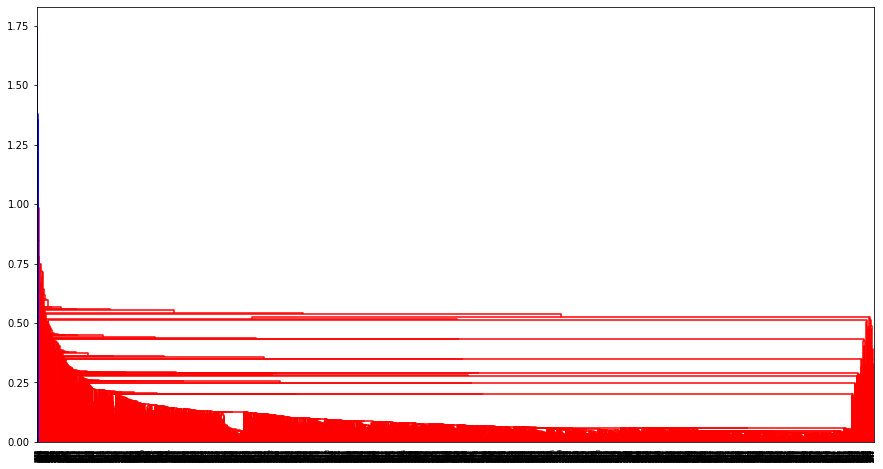

In [38]:
#SINGLE LINKAGE
plt.figure(figsize=(15,8))
mergings=linkage(df,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

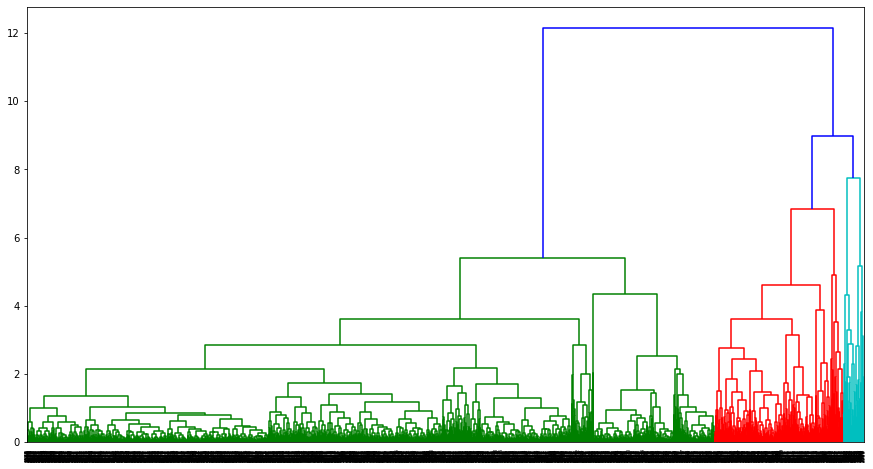

In [39]:
plt.figure(figsize=(15,8))
mergings=linkage(df,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

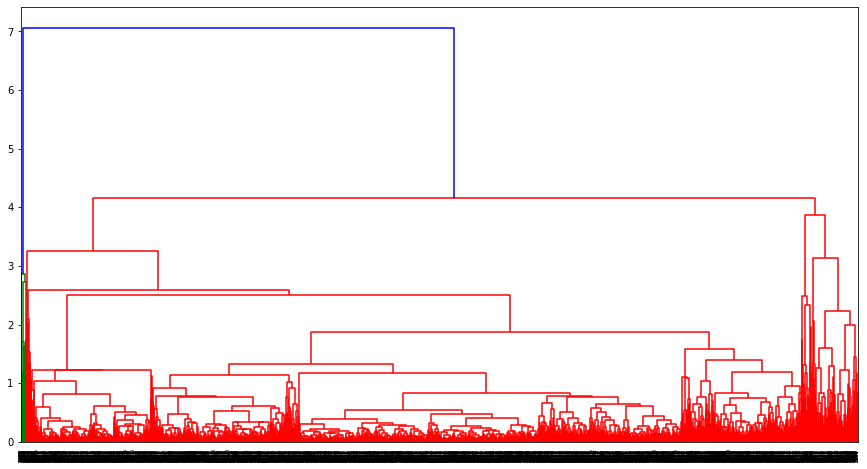

In [40]:
plt.figure(figsize=(15,8))
mergings=linkage(df,method='average',metric='euclidean')
dendrogram(mergings)
plt.show()

Cutting The dendrogram based on K

In [41]:
clusterlabels=cut_tree(mergings,n_clusters=3).reshape(-1,)
clusterlabels

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
rfm['Clusterlabels']=clusterlabels
rfm.head()

,CustomerID,Amount,Frequency,Recency,ClusterID,Clusterlabels
0,12346.0,0.00,2,325,2,0
1,12347.0,4310.00,182,1,0,0
2,12348.0,1797.24,31,74,1,0
3,12349.0,1757.55,73,18,1,0
4,12350.0,334.40,17,309,2,0


In [43]:
fig = px.box(rfm, x="Clusterlabels", y="Amount",color="Clusterlabels")
fig.show()

In [45]:
fig = px.box(rfm, x="Clusterlabels", y="Frequency",color="Clusterlabels")
fig.show()

In [44]:
fig = px.box(rfm, x="Clusterlabels", y="Recency",color="Clusterlabels")
fig.show()

In [46]:
fig=px.scatter_3d(x=rfm['Amount'],y=rfm['Frequency'], z=rfm['Recency'],color=rfm['Clusterlabels'])
fig.show()

## FINAL ANALYSIS

**INFERENCE:**

1. ***K-Means Clustering with 3 Cluster Ids***

~   Customers with Cluster Id 0 are the customers with high amount of transactions as compared to other customers.

~   Customers with Cluster Id 0 are frequent buyers.

~   Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view

2. ***Hierarchical Clustering with 3 Cluster Labels***

~   Customers with Cluster_Labels 2 are the customers with high amount of transactions as compared to other customers.

~   Customers with Cluster_Labels 2 are frequent buyers.

~   Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view